In [3]:
def Plot_Parameters(fieldname, fieldid, tab, season):
    """ Plot simulation
    parameters ('X1', 'Color', 'DayMax', 'z')
    Input
    ---------
    fieldname: (DD or WFD)
    fieldid: (as given by OpSim)
    tab: recarray of parameters
    season: season

    Returns
    ---------
    Plot (X1,Color,DayMax,SN_Rate)
    """

    idx = tab['season'] == season
    sel = tab[idx]
    thesize = 15
    toplot = ['X1', 'Color', 'DayMax', 'z']
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 9))
    fig.suptitle(fieldname+'  - Fieldid '+str(fieldid) +
                 ' - season '+str(season+1), fontsize=thesize)

    for i, var in enumerate(toplot):
        ix = int(i/2)
        iy = i % 2
        axis = ax[ix][iy]
        if var != 'z':
            axis.hist(sel[var])
        axis.set_xlabel(var, fontsize=20)
        axis.set_ylabel('Number of entries', fontsize=thesize)
        axis.tick_params(axis='x', labelsize=thesize)
        axis.tick_params(axis='y', labelsize=thesize)
        if var == 'z':
            n, bins, patches = axis.hist(sel[var])
            bin_center = (bins[:-1] + bins[1:]) / 2
            dz = bins[1]-bins[0]
            sn_rate = SN_Rate(rate='Perrett', H0=72, Om0=0.3)
            zmin = np.min(sel['z'])
            zmax = np.max(sel['z'])
            duration = np.max(sel['DayMax'])-np.min(sel['DayMax'])
            zz, rate, err_rate, nsn, err_nsn = sn_rate(
                zmin=zmin-dz/2., zmax=zmax, dz=dz, duration=duration)
            axis.plot(zz, np.cumsum(nsn))
            axis.plot(bin_center, np.cumsum(n))
    plt.show()


In [7]:
import h5py
import pylab as plt
from astropy.table import Table
from SN_Rate import SN_Rate
import numpy as np

filename = '/home/philippe/LSST/SN_pipelines/Output_Simu/Simu_WFD_0.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())


OSError: Unable to open file (unable to open file: name = '/home/philippe/LSST/SN_pipelines/Output_Simu/Simu_WFD_0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

33 [('SNID', '<i4'), ('Ra', '<f8'), ('Dec', '<f8'), ('DayMax', '<f8'), ('X1', '<f8'), ('Color', '<f8'), ('z', '<f8'), ('id_hdf5', '<i4'), ('season', '<i4'), ('fieldname', 'S3'), ('fieldid', '<i8')]
fieldname fieldid
--------- -------
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      ...     ...
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
      WFD   10326
Length = 33 rows


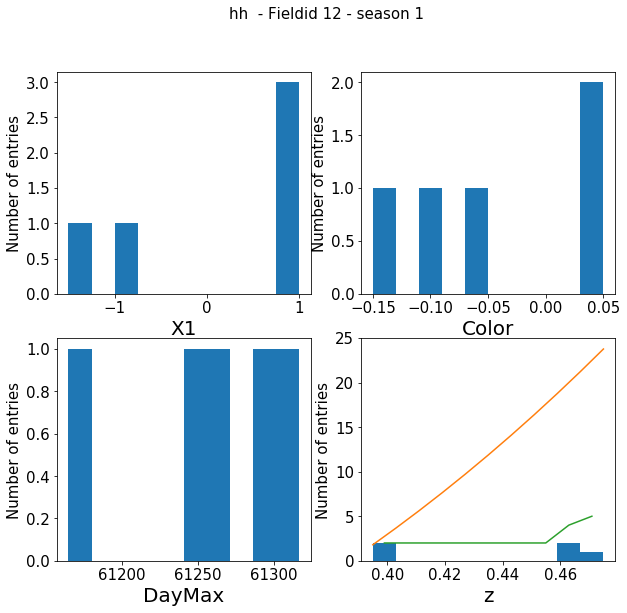

In [6]:
for i, key in enumerate(f.keys()):
    summary = Table.read(filename, path=key)
    print(len(summary), summary.dtype)
    print(summary[['fieldname','fieldid']])
    Plot_Parameters('hh',12,summary, 0)    